In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import pickle

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import statsmodels
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [8]:
lang_codes = ["ja", "ko", "tr", "sv" , "no", "fi", "da", "sr", "it" , "ca", "nl", "fr", "de"]
ctr_codes = ["JPN", "KOR", "TUR", "SWE", "NOR", "FIN", "DEN", "SER", "ITA", "SPA", "NET", "FRA", "GER"]
code_dict = dict(zip(lang_codes, ctr_codes))
country_region = {'East Asia': ['ja', 'ko'], 'West Asia': ['tr'], 'Northern Europe': ['sv', 'no', 'fi', 'da'],
        'Southern Europe': ['sr', 'it', 'ca'], 'Western Europe':['nl', 'fr', 'de'], 'North America': ['en']}

agg = pd.read_json("data/aggregated_timeseries.json.gz")
df_interventions = pd.read_csv('data/interventions.csv')
hofstede = pd.read_csv("data/6-dimensions-for-website-2015-08-16.csv", sep=";")
display(hofstede)
hofstede = hofstede[hofstede.ctr.isin(ctr_codes)].set_index('ctr').drop('country', axis=1).astype(int)
display(agg)


,ctr,country,pdi,idv,mas,uai,ltowvs,ivr
0,AFE,Africa East,64,27,41,52,32,40
1,AFW,Africa West,77,20,46,54,9,78
2,ALB,Albania,#NULL!,#NULL!,#NULL!,#NULL!,61,15
3,ALG,Algeria,#NULL!,#NULL!,#NULL!,#NULL!,26,32
4,AND,Andorra,#NULL!,#NULL!,#NULL!,#NULL!,#NULL!,65
...,...,...,...,...,...,...,...,...
106,URU,Uruguay,61,36,38,100,26,53
107,VEN,Venezuela,81,12,73,76,16,100
108,VIE,Vietnam,70,20,40,30,57,35
109,ZAM,Zambia,#NULL!,#NULL!,#NULL!,#NULL!,30,42


,ja.m,it,da.m,tr,no.m,en,sr,tr.m,en.m,no,...,ko.m,fi.m,sr.m,ja,fr,fi,ca,it.m,sv.m,ko
len,1197788,1594039,256451,346007,516838,6047509,632128,345790,6045654,531478,...,489181,480638,396063,1197856,2195949,481854,642031,1588312,1959446,490314
sum,"{'2018-01-01 00:00:00': 22328288, '2018-01-02 ...","{'2018-01-01 00:00:00': 3338750, '2018-01-02 0...","{'2018-01-01 00:00:00': 765123, '2018-01-02 00...","{'2018-01-01 00:00:00': 407629, '2018-01-02 00...","{'2018-01-01 00:00:00': 715031, '2018-01-02 00...","{'2018-01-01 00:00:00': 86763830, '2018-01-02 ...","{'2018-01-01 00:00:00': 192409, '2018-01-02 00...","{'2018-01-01 00:00:00': 493684, '2018-01-02 00...","{'2018-01-01 00:00:00': 135822131, '2018-01-02...","{'2018-01-01 00:00:00': 224417, '2018-01-02 00...",...,"{'2018-01-01 00:00:00': 1484496, '2018-01-02 0...","{'2018-01-01 00:00:00': 1319053, '2018-01-02 0...","{'2018-01-01 00:00:00': 451383, '2018-01-02 00...","{'2018-01-01 00:00:00': 7828155, '2018-01-02 0...","{'2018-01-01 00:00:00': 6441009, '2018-01-02 0...","{'2018-01-01 00:00:00': 523135, '2018-01-02 00...","{'2018-01-01 00:00:00': 111910, '2018-01-02 00...","{'2018-01-01 00:00:00': 12856884, '2018-01-02 ...","{'2018-01-01 00:00:00': 2383474, '2018-01-02 0...","{'2018-01-01 00:00:00': 819174, '2018-01-02 00..."
covid,"{'len': 30, 'sum': {'2018-01-01 00:00:00': 55,...","{'len': 33, 'sum': {'2018-01-01 00:00:00': 50,...","{'len': 4, 'sum': {'2018-01-01 00:00:00': 0, '...","{'len': 64, 'sum': {'2018-01-01 00:00:00': 1, ...","{'len': 10, 'sum': {'2018-01-01 00:00:00': 7, ...","{'len': 306, 'sum': {'2018-01-01 00:00:00': 57...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 6, '...","{'len': 64, 'sum': {'2018-01-01 00:00:00': 3, ...","{'len': 306, 'sum': {'2018-01-01 00:00:00': 91...","{'len': 10, 'sum': {'2018-01-01 00:00:00': 2, ...",...,"{'len': 113, 'sum': {'2018-01-01 00:00:00': 6,...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 0, '...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 11, ...","{'len': 30, 'sum': {'2018-01-01 00:00:00': 26,...","{'len': 16, 'sum': {'2018-01-01 00:00:00': 62,...","{'len': 9, 'sum': {'2018-01-01 00:00:00': 2, '...","{'len': 49, 'sum': {'2018-01-01 00:00:00': 6, ...","{'len': 33, 'sum': {'2018-01-01 00:00:00': 139...","{'len': 8, 'sum': {'2018-01-01 00:00:00': 19, ...","{'len': 113, 'sum': {'2018-01-01 00:00:00': 3,..."
topics,{'Culture.Biography.Biography*': {'len': 14904...,{'Culture.Biography.Biography*': {'len': 29427...,{'Culture.Biography.Biography*': {'len': 57720...,{'Culture.Biography.Biography*': {'len': 70443...,{'Culture.Biography.Biography*': {'len': 11603...,{'Culture.Biography.Biography*': {'len': 14038...,{'Culture.Biography.Biography*': {'len': 37718...,{'Culture.Biography.Biography*': {'len': 70434...,{'Culture.Biography.Biography*': {'len': 14038...,{'Culture.Biography.Biography*': {'len': 11804...,...,{'Culture.Biography.Biography*': {'len': 75406...,{'Culture.Biography.Biography*': {'len': 10422...,{'Culture.Biography.Biography*': {'len': 37580...,{'Culture.Biography.Biography*': {'len': 14904...,{'Culture.Biography.Biography*': {'len': 38258...,{'Culture.Biography.Biography*': {'len': 10444...,{'Culture.Biography.Biography*': {'len': 10175...,{'Culture.Biography.Biography*': {'len': 29422...,{'Culture.Biography.Biography*': {'len': 14668...,{'Culture.Biography.Biography*': {'len': 75498...


KeyError: 'date'

In [13]:
dfs = []
codes = lang_codes + [x + '.m' for x in lang_codes]

dfs = []

for language in codes:
    language_data = agg[language]
    all_sum = pd.Series(agg[language]['sum'])
    if 0 in all_sum.values:
        all_sum.replace(0, 1, inplace=True)
    
    for topic, topic_data in language_data["topics"].items():
        topic_sum = pd.Series(topic_data['sum']) # number of pageviews per day for a topic
        topic_df = pd.DataFrame({
            'pageviews': topic_sum.values,
            'language': [language] * len(topic_sum),
            'date': topic_sum.index,
            'topic': [topic] * len(topic_sum),
            'proportion': np.divide(topic_sum.values, all_sum.values)
        })
        dfs.append(topic_df)
        
df = pd.concat(dfs, ignore_index=True)
df.date = pd.to_datetime(df.date)


,pageviews,language,date,topic,proportion
0,1716611,ja,2018-01-01,Culture.Biography.Biography*,0.219287
1,1778375,ja,2018-01-02,Culture.Biography.Biography*,0.203025
2,2008370,ja,2018-01-03,Culture.Biography.Biography*,0.200914
3,2212806,ja,2018-01-04,Culture.Biography.Biography*,0.184755
4,2371514,ja,2018-01-05,Culture.Biography.Biography*,0.186047
...,...,...,...,...,...
1569147,400971,de.m,2020-07-27,STEM.Technology,0.026476
1569148,404054,de.m,2020-07-28,STEM.Technology,0.028487
1569149,414351,de.m,2020-07-29,STEM.Technology,0.029624
1569150,413956,de.m,2020-07-30,STEM.Technology,0.030701


In [16]:
#df_times = df_timeseries.loc[df_timeseries['date'] < "2020-07-27"]

# Get the unique languages from the interventions dataframe
languages = df_interventions['lang'].unique()

# Create an empty dictionary to store the cropped timeseries data for each language
cropped_timeseries = {}
cropped_timeseries_2 = {}


# Iterate over each language
for language in languages:
    if language != 'en':
        # Get the school closure date for the current language
        closure_date = df_interventions.loc[df_interventions['lang'] == language, 'School closure'].values[0]
        
        # Crop the timeseries data for the current language based on the closure date
        cropped_data = df.loc[(df['language'].str.contains(language, case=False, na=False)) & (df['date'] < closure_date)]
        cropped_data_2 = df.loc[(df['language'].str.contains(language, case=False, na=False)) & (df['date'] >= closure_date)]
        
        # Store the cropped data in the dictionary
        cropped_timeseries[language] = cropped_data
        cropped_timeseries_2[language] = cropped_data_2

# Concatenate all the cropped timeseries data into one dataframe
df_before = pd.concat(cropped_timeseries.values())
df_after = pd.concat(cropped_timeseries_2.values())


In [20]:
df_desktop = df_before[df_before.language.apply(lambda l : l in lang_codes)]
df_mobile = df_before[df_before.language.apply(lambda l : l[-2:] == ".m")]
df_mobile.loc[:,"language"] = df_mobile.language.apply(lambda l: l[:-2])
df_before = pd.concat([df_desktop, df_mobile]).groupby(["language", "topic", "date"]).sum().reset_index()
df_before["log_views"] = np.log(df_before.pageviews)
df_before.head()



,language,topic,date,pageviews,proportion,log_views
0,ca,Culture.Biography.Biography*,2018-01-01,68986,0.465804,11.141659
1,ca,Culture.Biography.Biography*,2018-01-02,65138,0.385468,11.084263
2,ca,Culture.Biography.Biography*,2018-01-03,62817,0.382883,11.047981
3,ca,Culture.Biography.Biography*,2018-01-04,67250,0.393519,11.116172
4,ca,Culture.Biography.Biography*,2018-01-05,57697,0.389505,10.962960


In [21]:
df_desktop = df_after[df_after.language.apply(lambda l : l in lang_codes)]
df_mobile = df_after[df_after.language.apply(lambda l : l[-2:] == ".m")]
df_mobile.loc[:,"language"] = df_mobile.language.apply(lambda l: l[:-2])
df_after = pd.concat([df_desktop, df_mobile]).groupby(["language", "topic", "date"]).sum().reset_index()
df_after["log_views"] = np.log(df_after.pageviews)
df_after.head()


,language,topic,date,pageviews,proportion,log_views
0,ca,Culture.Biography.Biography*,2020-03-12,154157,0.451033,11.945727
1,ca,Culture.Biography.Biography*,2020-03-13,131326,0.436129,11.785438
2,ca,Culture.Biography.Biography*,2020-03-14,135144,0.490746,11.814096
3,ca,Culture.Biography.Biography*,2020-03-15,166352,0.567677,12.021861
4,ca,Culture.Biography.Biography*,2020-03-16,164611,0.474621,12.011340


In [11]:
lang_codes = ["ja", "ko", "tr", "sv" , "no", "fi", "da", "sr", "it" , "ca", "nl", "fr", "de"]
ctr_codes = ["JPN", "KOR", "TUR", "SWE", "NOR", "FIN", "DEN", "SER", "ITA", "SPA", "NET", "FRA", "GER"]
code_dict = dict(zip(lang_codes, ctr_codes))
country_region = {'East Asia': ['ja', 'ko'], 'West Asia': ['tr'], 'Northern Europe': ['sv', 'no', 'fi', 'da'],
        'Southern Europe': ['sr', 'it', 'ca'], 'Western Europe':['nl', 'fr', 'de'], 'North America': ['en']}

agg = pd.read_json("data/aggregated_timeseries.json.gz")
hofstede = pd.read_csv("data/6-dimensions-for-website-2015-08-16.csv", sep=";")
hofstede = hofstede[hofstede.ctr.isin(ctr_codes)].set_index('ctr').drop('country', axis=1).astype(int)
hofstede


,pdi,idv,mas,uai,ltowvs,ivr
ctr,,,,,,
DEN,18,74,16,23,35,70
FIN,33,63,26,59,38,57
FRA,68,71,43,86,63,48
GER,35,67,66,65,83,40
ITA,50,76,70,75,61,30
JPN,54,46,95,92,88,42
KOR,60,18,39,85,100,29
NET,38,80,14,53,67,68
NOR,31,69,8,50,35,55


In [22]:
prop_before = df_before[['topic', 'language', 'proportion']].groupby(['topic', 'language']).agg(['mean'])
topics = prop_before.index.get_level_values('topic').unique()
correlation_before = []

for topic in topics:
    for dim in hofstede.columns:
        series = prop_before.loc[topic]['proportion']
        series.index = series.index.map(code_dict)
        series = series.sort_index()
        corr = hofstede[dim].corr(series['mean'])
        correlation_before.append({'topic': topic, 'dimension': dim, 'correlation': corr})
corr_df_before = pd.DataFrame(correlation_before).pivot(index='topic', columns='dimension', values='correlation')

prop_after = df_after[['topic', 'language', 'proportion']].groupby(['topic', 'language']).agg(['mean'])
topics = prop_after.index.get_level_values('topic').unique()
correlation_after = []

for topic in topics:
    for dim in hofstede.columns:
        series = prop_after.loc[topic]['proportion']
        series.index = series.index.map(code_dict)
        series = series.sort_index()
        corr = hofstede[dim].corr(series['mean'])
        correlation_after.append({'topic': topic, 'dimension': dim, 'correlation': corr})
corr_df_after = pd.DataFrame(correlation_after).pivot(index='topic', columns='dimension', values='correlation')


Text(0.5, 1.0, 'Correlation between Individuality and Page Views Trends in countries after school closure')

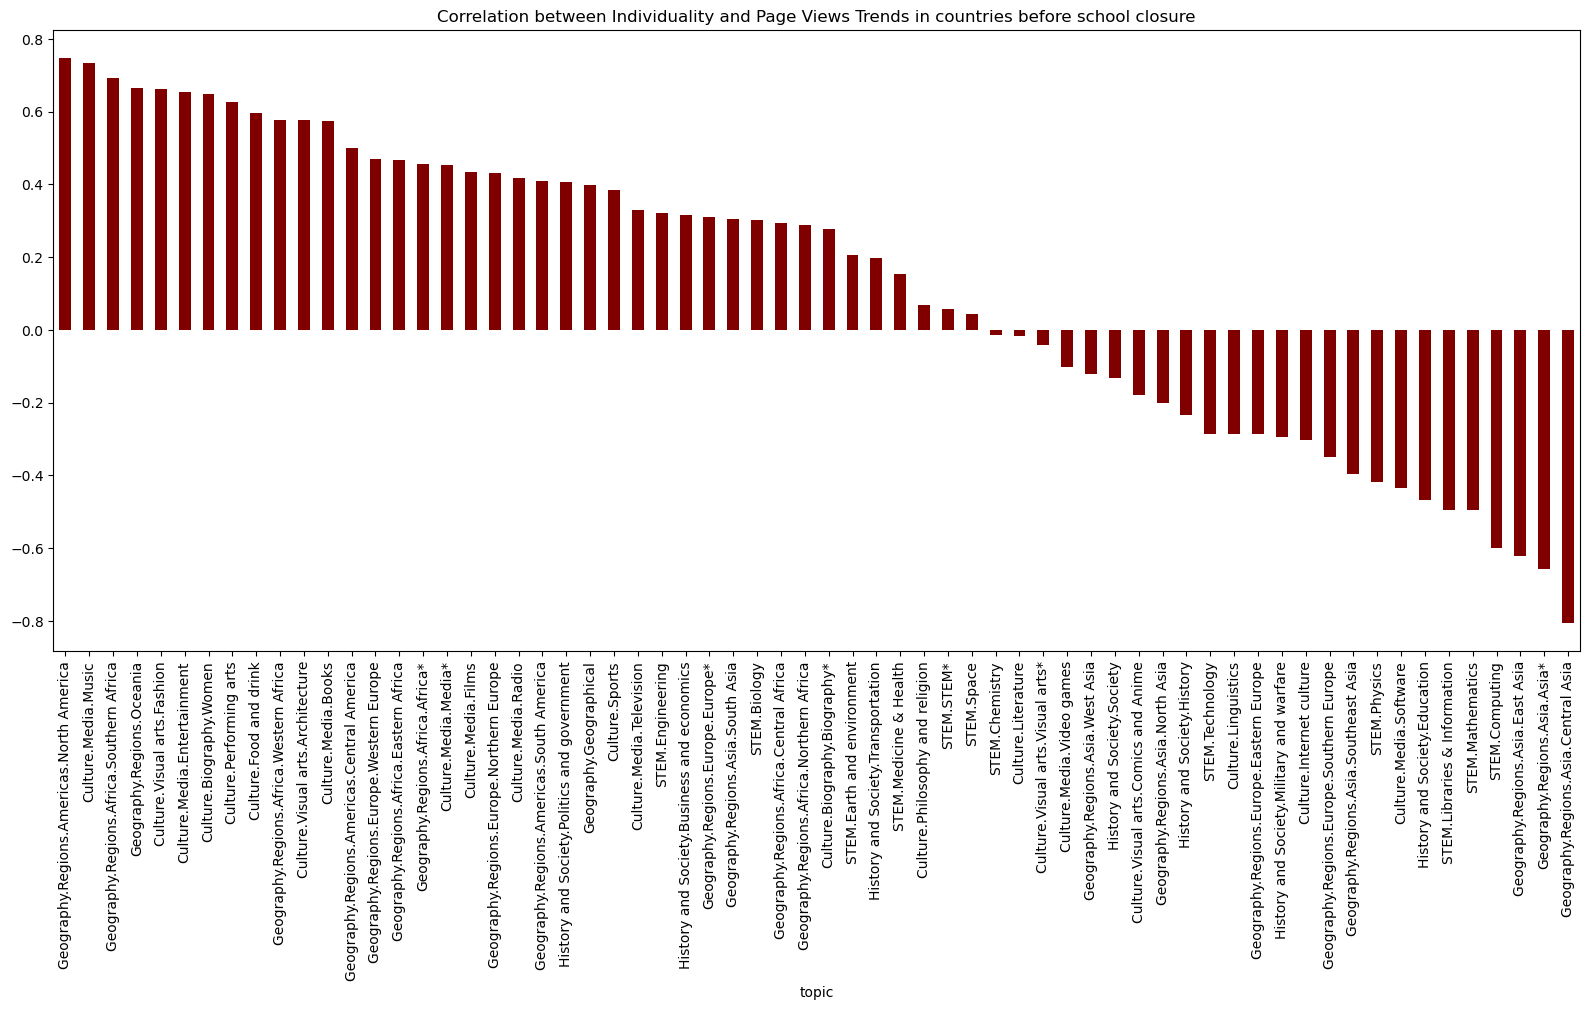

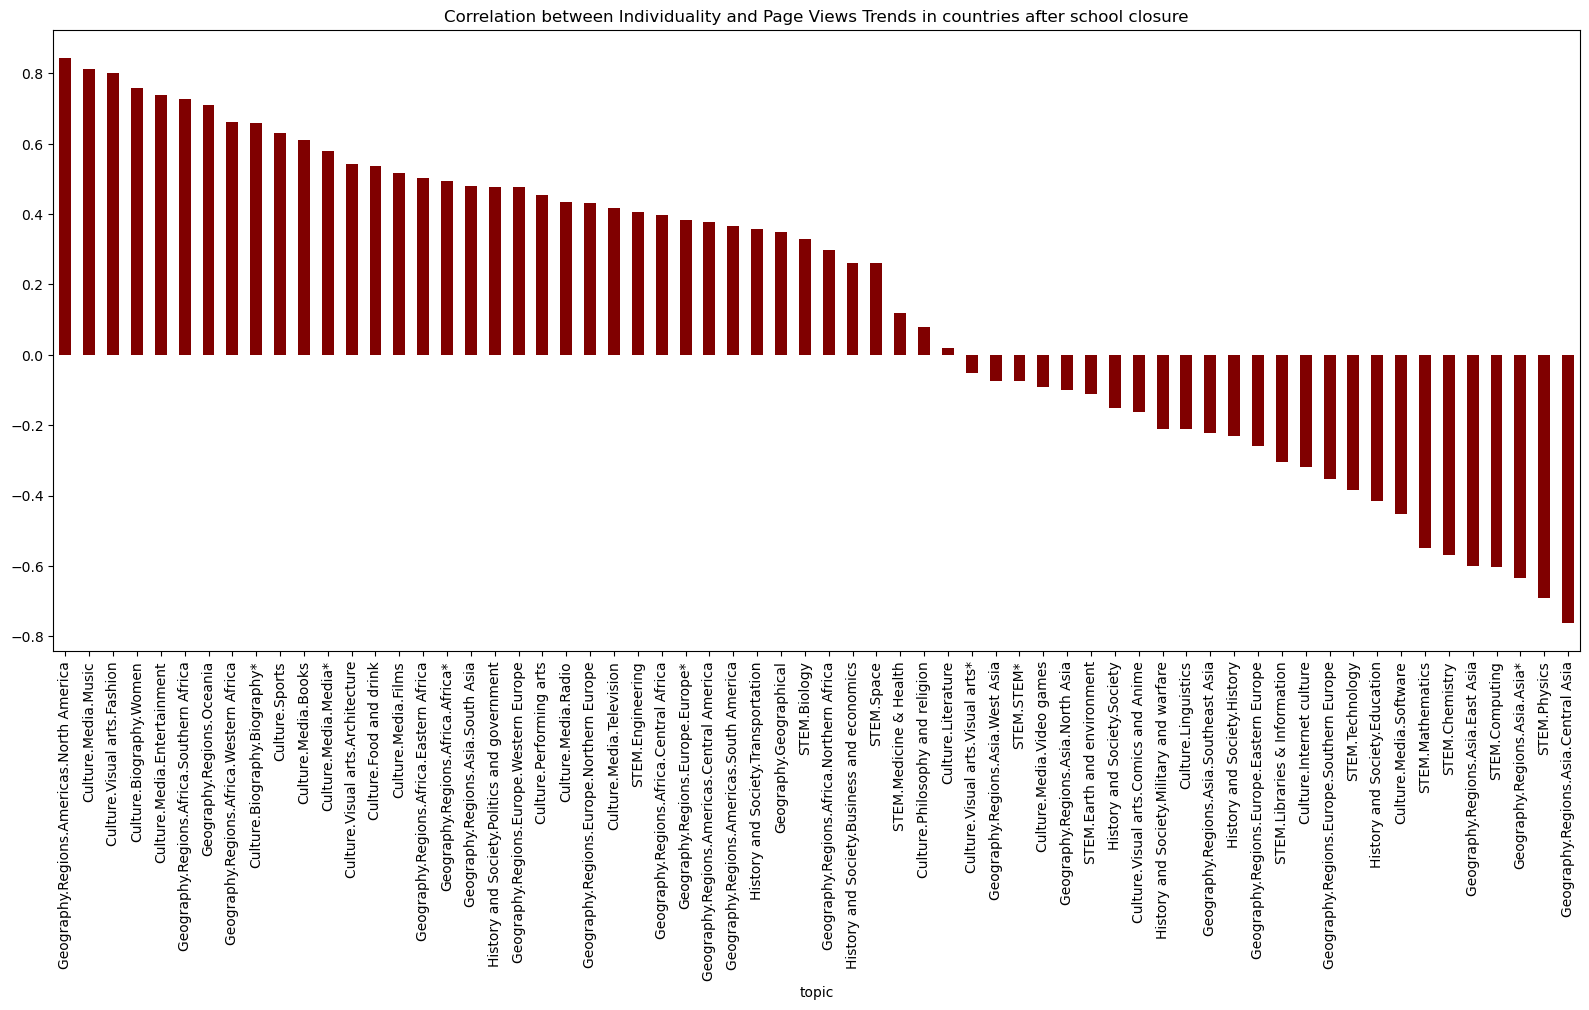

In [23]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
corr_df_before['idv'].sort_values(ascending=False).plot.bar(x = "topic", y = "correlation", ax=ax,color ='maroon')
fig.tight_layout()
ax.set_title("Correlation between Individuality and Page Views Trends in countries before school closure")

fig, ax = plt.subplots(1,1,figsize=(16,10))
corr_df_after['idv'].sort_values(ascending=False).plot.bar(x = "topic", y = "correlation", ax=ax,color ='maroon')
fig.tight_layout()
ax.set_title("Correlation between Individuality and Page Views Trends in countries after school closure")


Text(0.5, 1.0, 'Correlation between Indulgence/Restraint and Page Views Trends in countries after school closure')

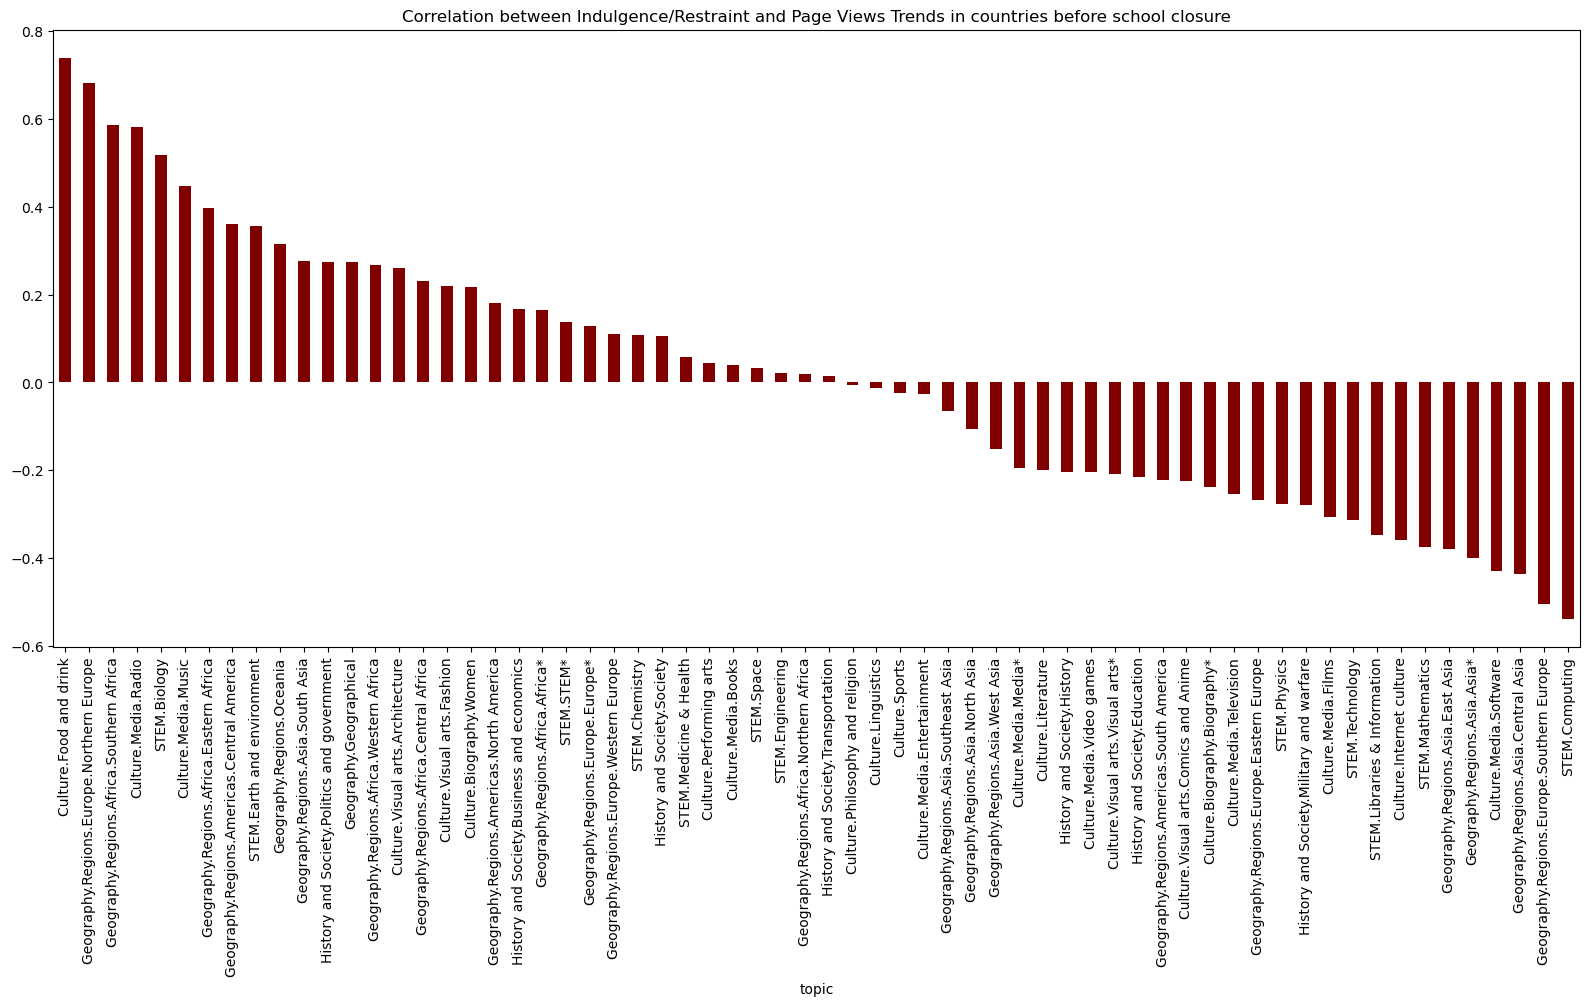

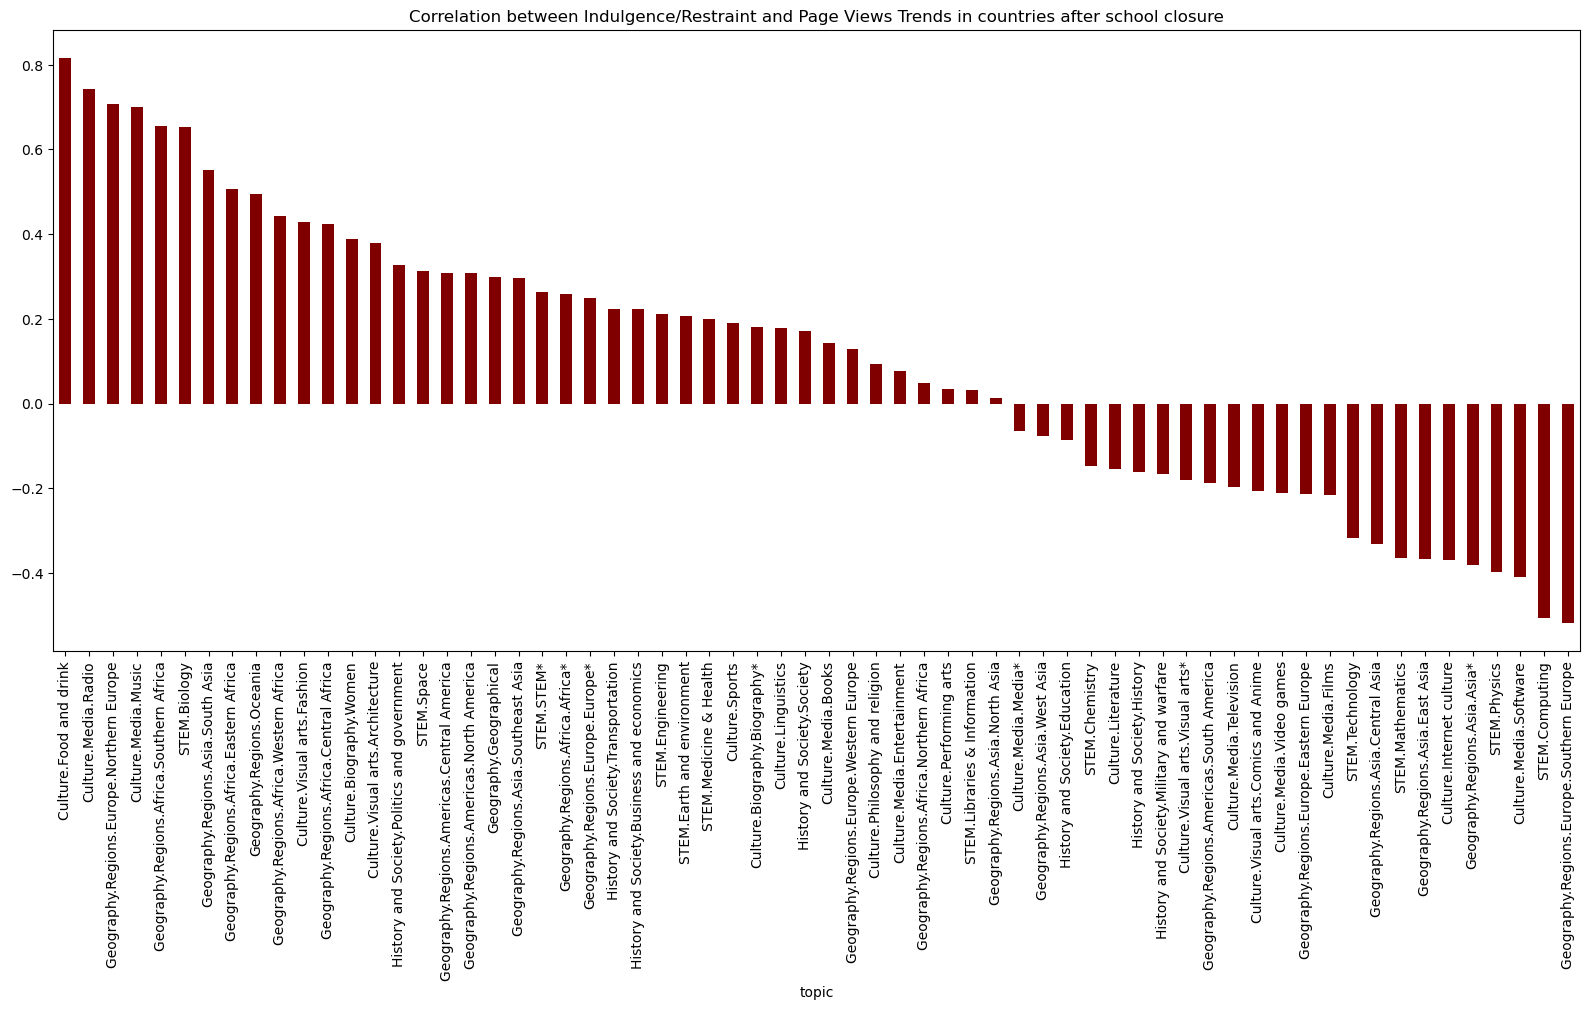

In [24]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
corr_df_before['ivr'].sort_values(ascending=False).plot.bar(x = "topic", y = "correlation", ax=ax,color ='maroon')
fig.tight_layout()
ax.set_title("Correlation between Indulgence/Restraint and Page Views Trends in countries before school closure")

fig, ax = plt.subplots(1,1,figsize=(16,10))
corr_df_after['ivr'].sort_values(ascending=False).plot.bar(x = "topic", y = "correlation", ax=ax,color ='maroon')
fig.tight_layout()
ax.set_title("Correlation between Indulgence/Restraint and Page Views Trends in countries after school closure")


Text(0.5, 1.0, 'Correlation between Long Term/Short Term orientation and Page Views Trends in countries after school closure')

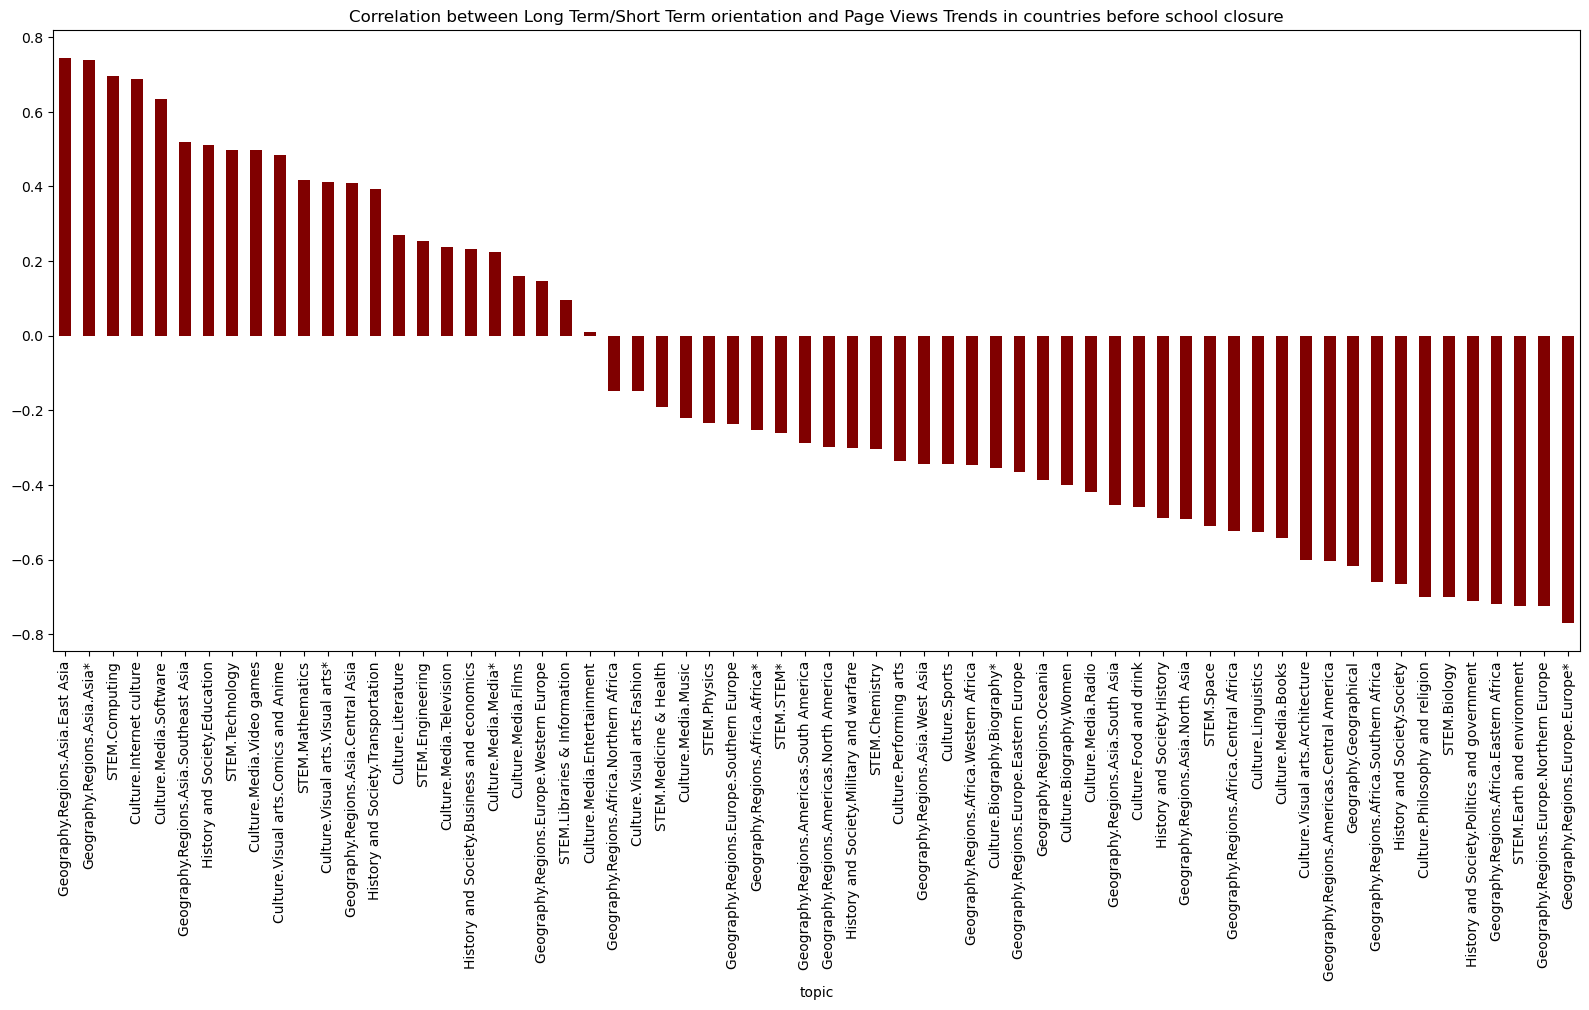

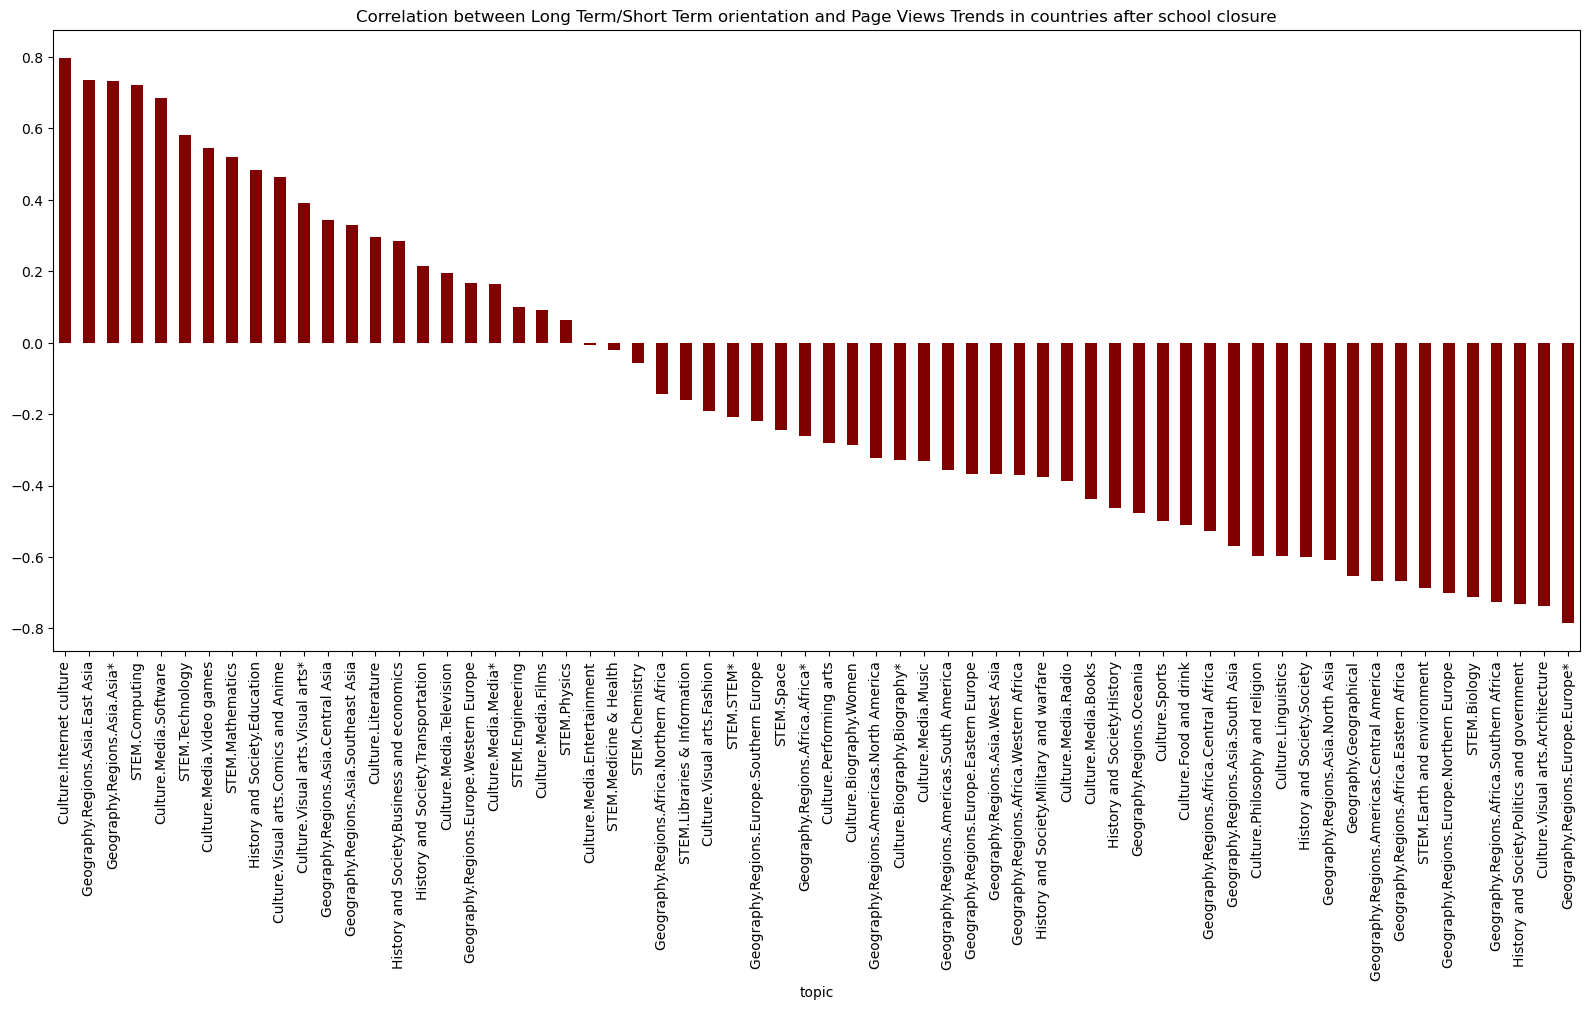

In [25]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
corr_df_before["ltowvs"].sort_values(ascending=False).plot.bar(x = "topic", y = "correlation", ax=ax,color ='maroon')
fig.tight_layout()
ax.set_title("Correlation between Long Term/Short Term orientation and Page Views Trends in countries before school closure")

fig, ax = plt.subplots(1,1,figsize=(16,10))
corr_df_after["ltowvs"].sort_values(ascending=False).plot.bar(x = "topic", y = "correlation", ax=ax,color ='maroon')
fig.tight_layout()
ax.set_title("Correlation between Long Term/Short Term orientation and Page Views Trends in countries after school closure")


Text(0.5, 1.0, 'Correlation between MAS and Page Views Trends in countries after school closure')

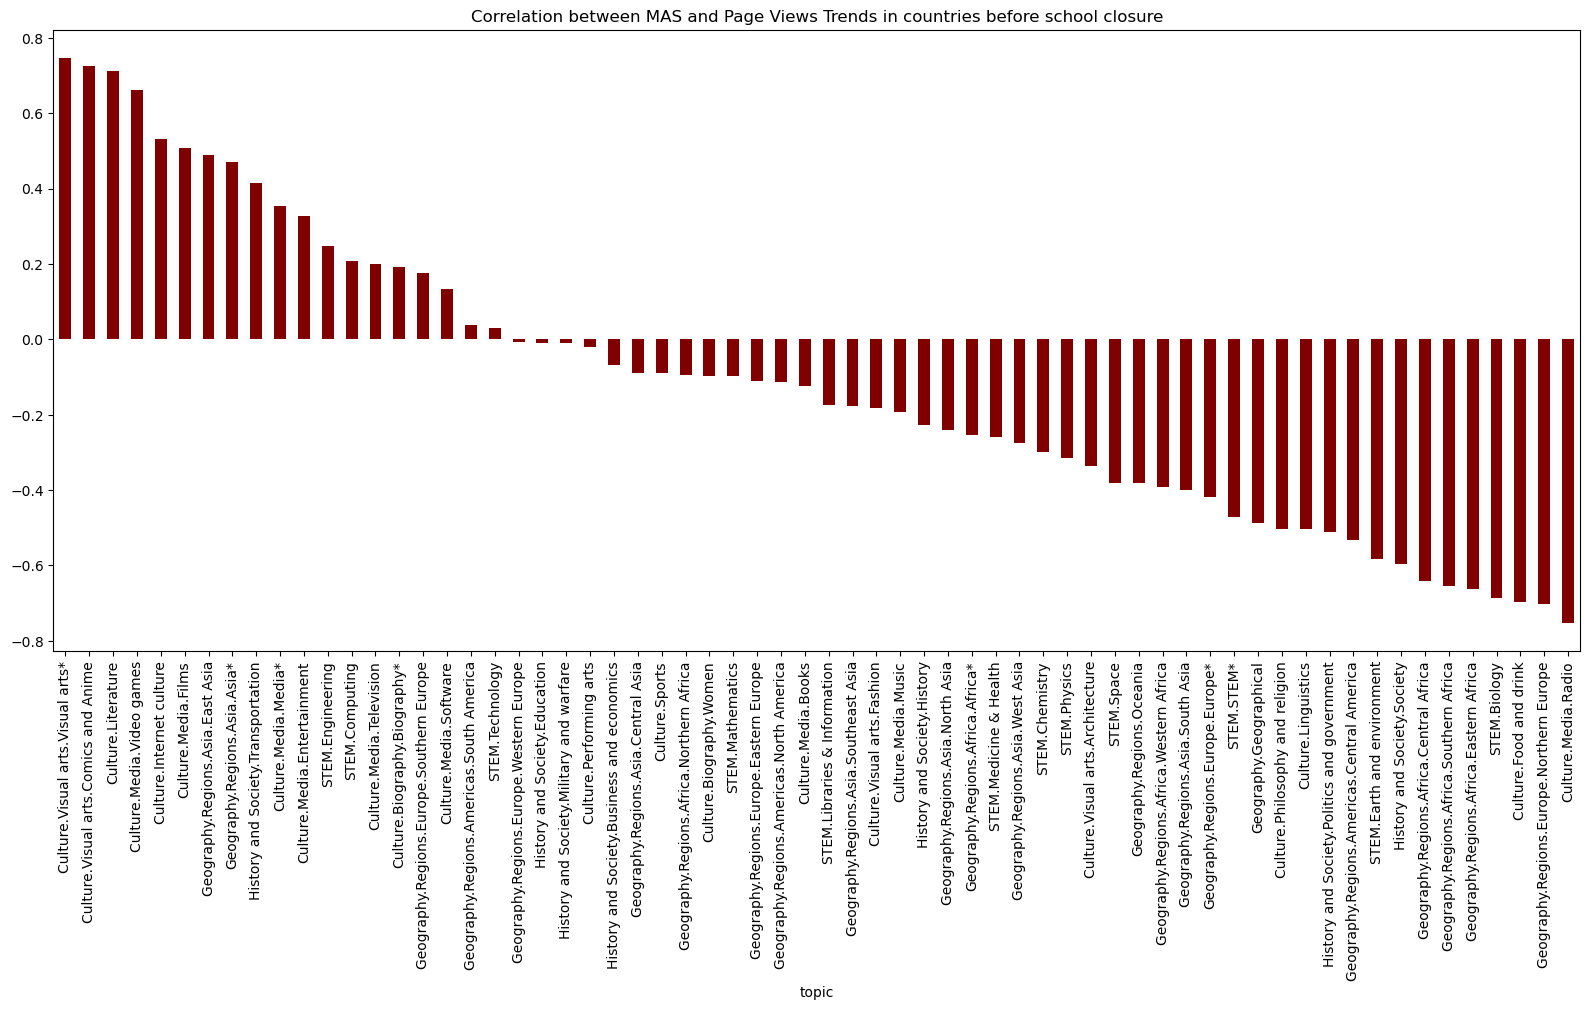

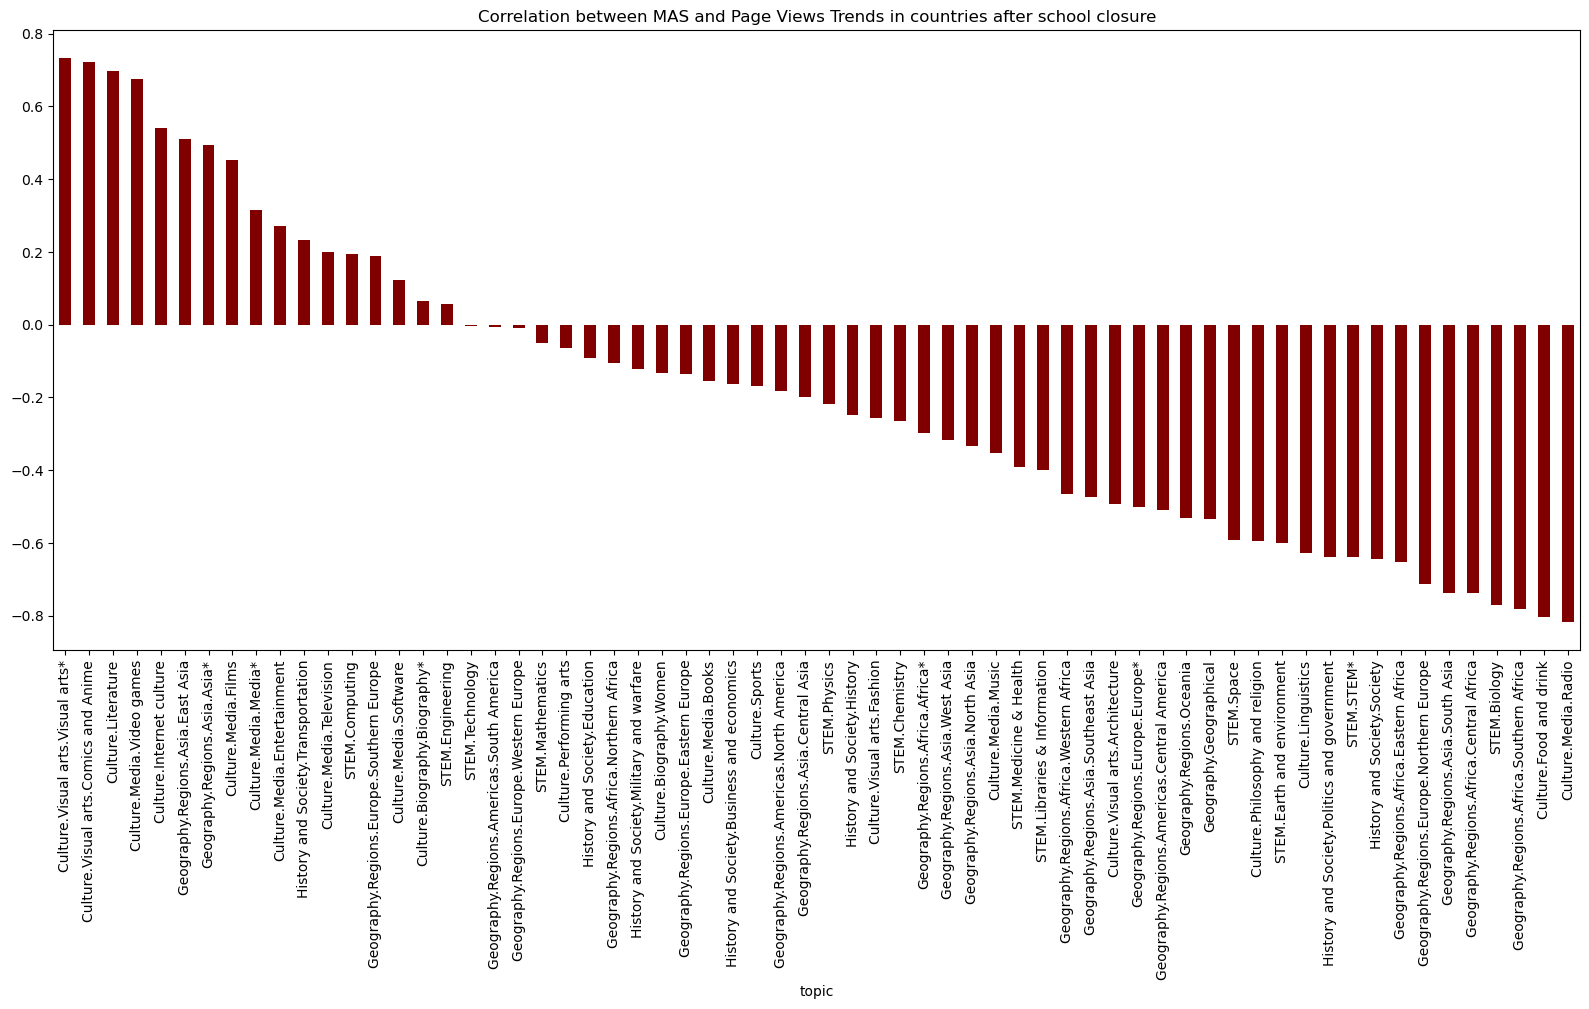

In [26]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
corr_df_before["mas"].sort_values(ascending=False).plot.bar(x = "topic", y = "correlation", ax=ax,color ='maroon')
fig.tight_layout()
ax.set_title("Correlation between MAS and Page Views Trends in countries before school closure")

fig, ax = plt.subplots(1,1,figsize=(16,10))
corr_df_after["mas"].sort_values(ascending=False).plot.bar(x = "topic", y = "correlation", ax=ax,color ='maroon')
fig.tight_layout()
ax.set_title("Correlation between MAS and Page Views Trends in countries after school closure")


Text(0.5, 1.0, 'Correlation between Uncertainty Avoidance and Page Views Trends in countries after school closure')

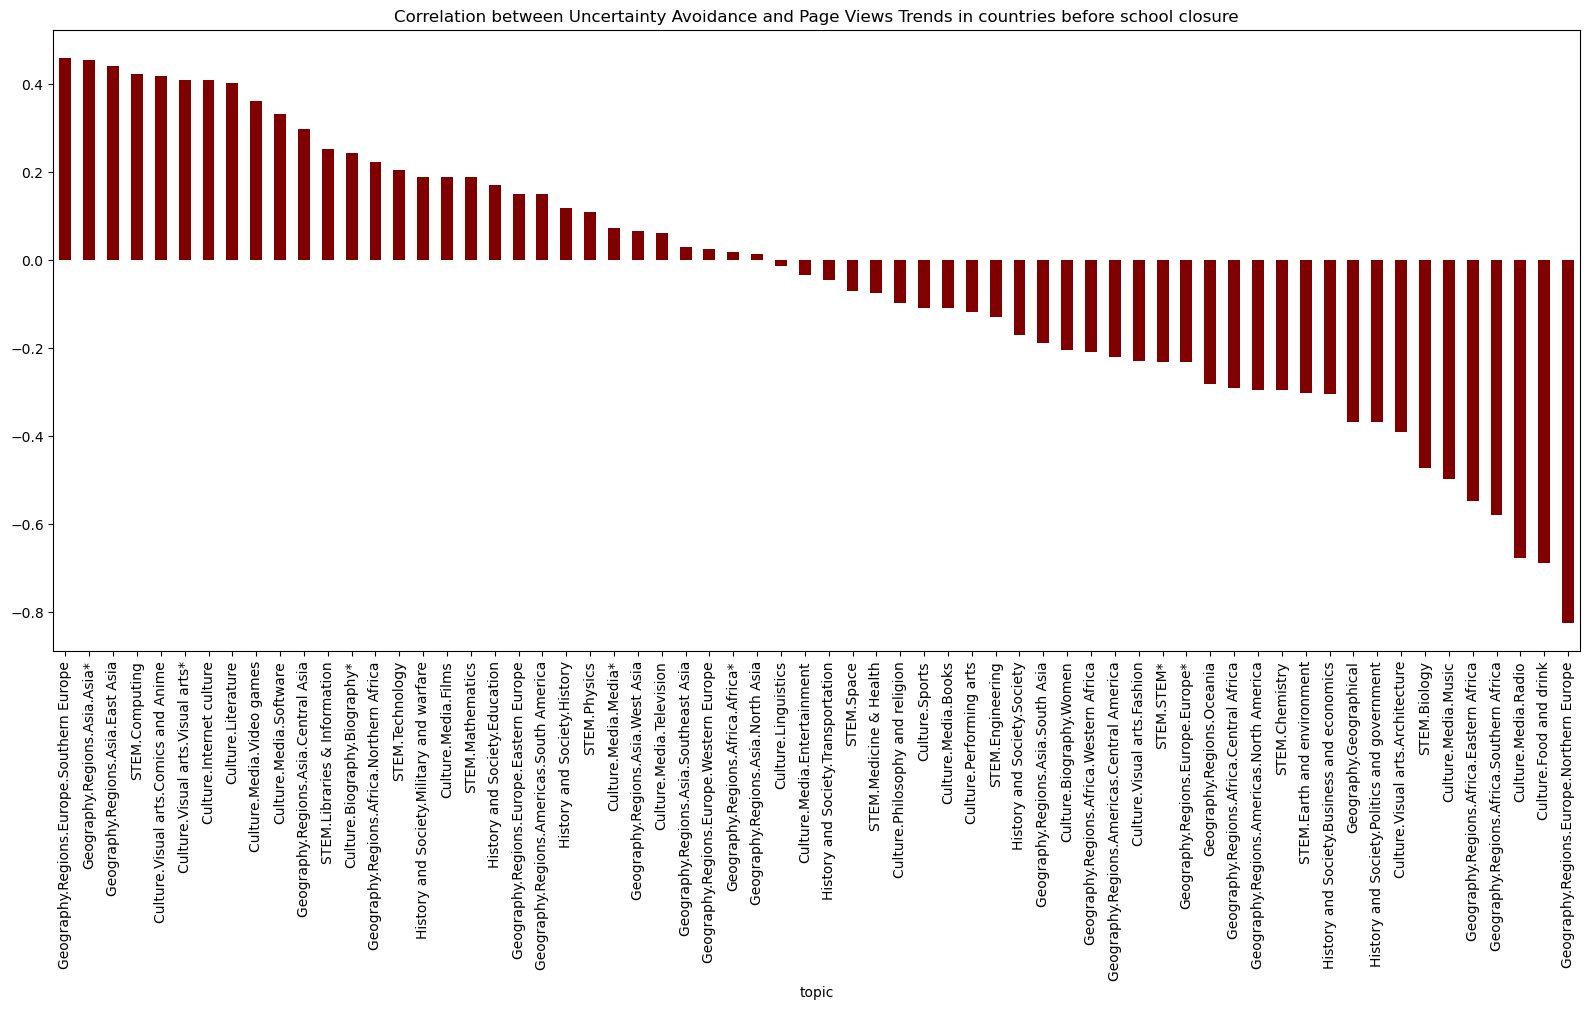

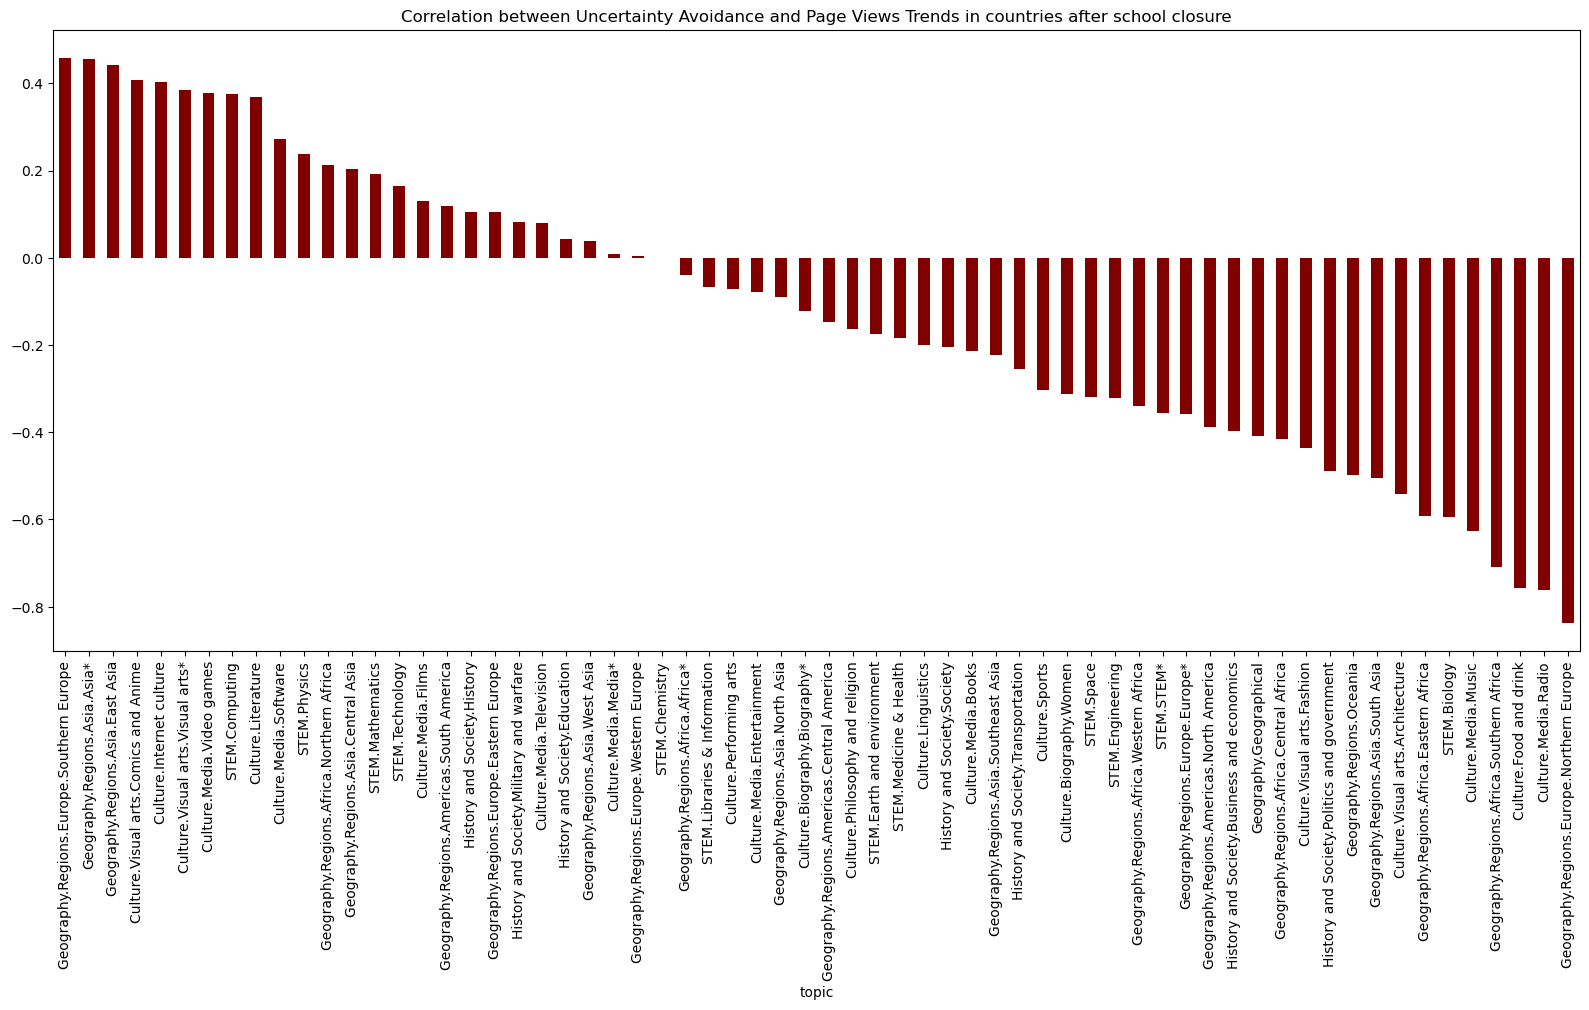

In [27]:
fig, ax = plt.subplots(1,1,figsize=(16,10))
corr_df_before["uai"].sort_values(ascending=False).plot.bar(x = "topic", y = "correlation", ax=ax,color ='maroon')
fig.tight_layout()
ax.set_title("Correlation between Uncertainty Avoidance and Page Views Trends in countries before school closure")

fig, ax = plt.subplots(1,1,figsize=(16,10))
corr_df_after["uai"].sort_values(ascending=False).plot.bar(x = "topic", y = "correlation", ax=ax,color ='maroon')
fig.tight_layout()
ax.set_title("Correlation between Uncertainty Avoidance and Page Views Trends in countries after school closure")


/Users/fuligrad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fuligrad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fuligrad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fuligrad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

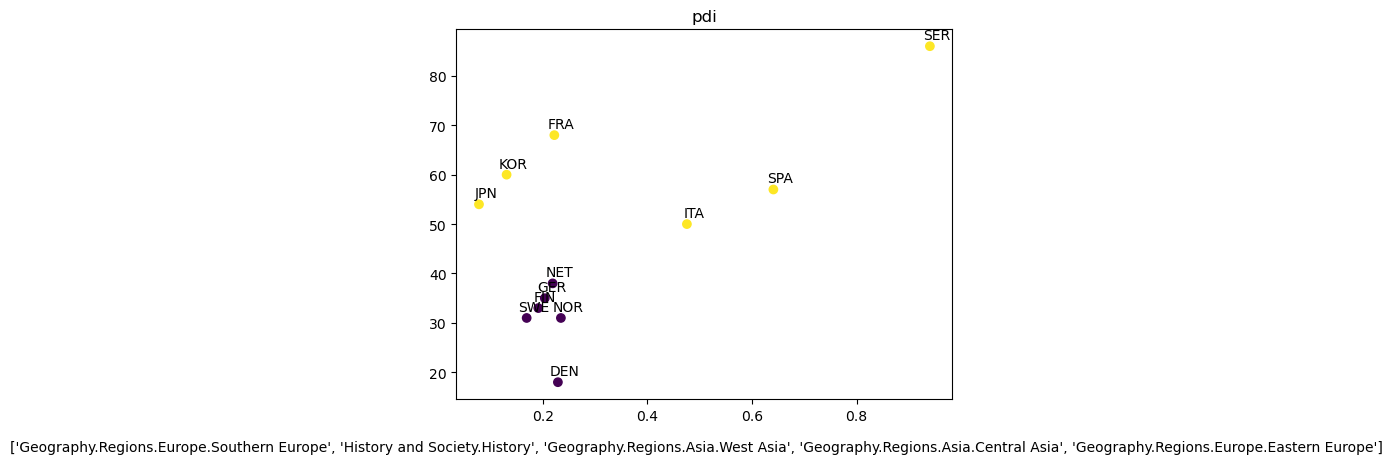

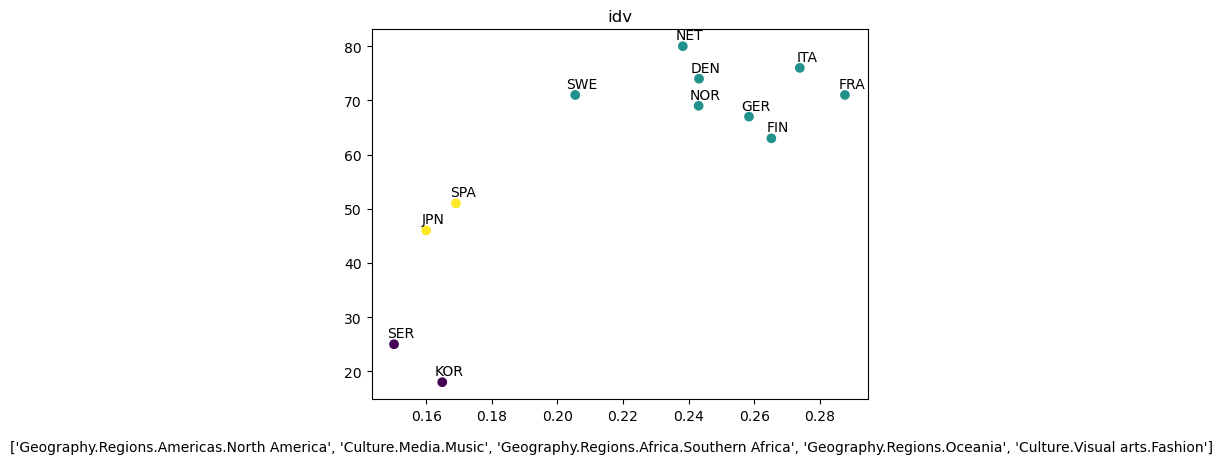

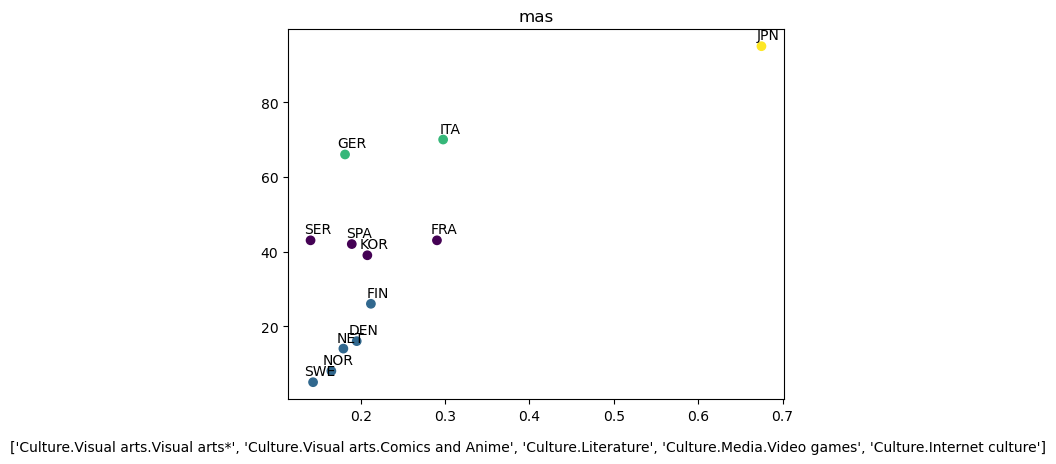

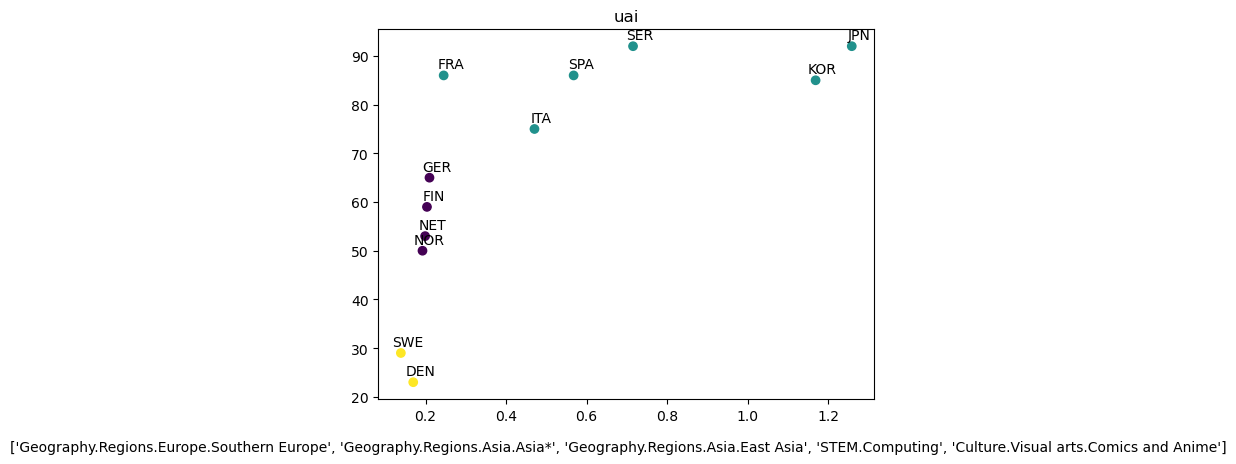

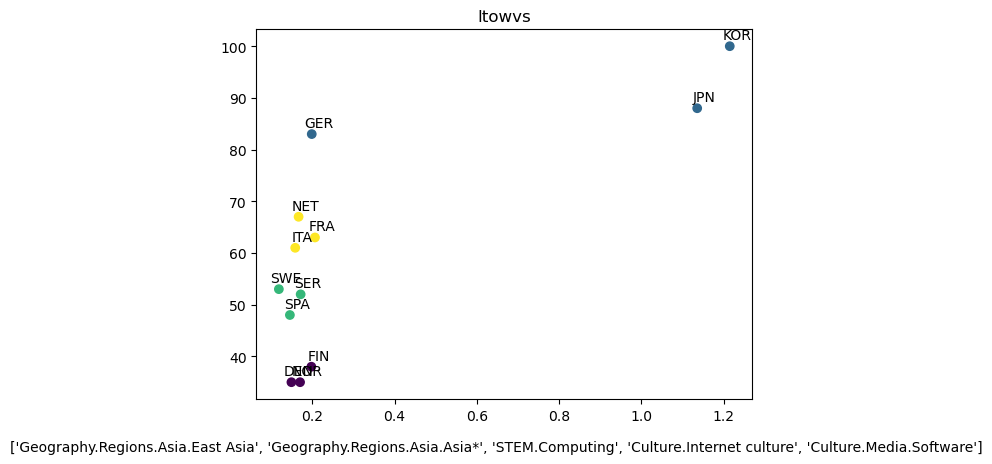

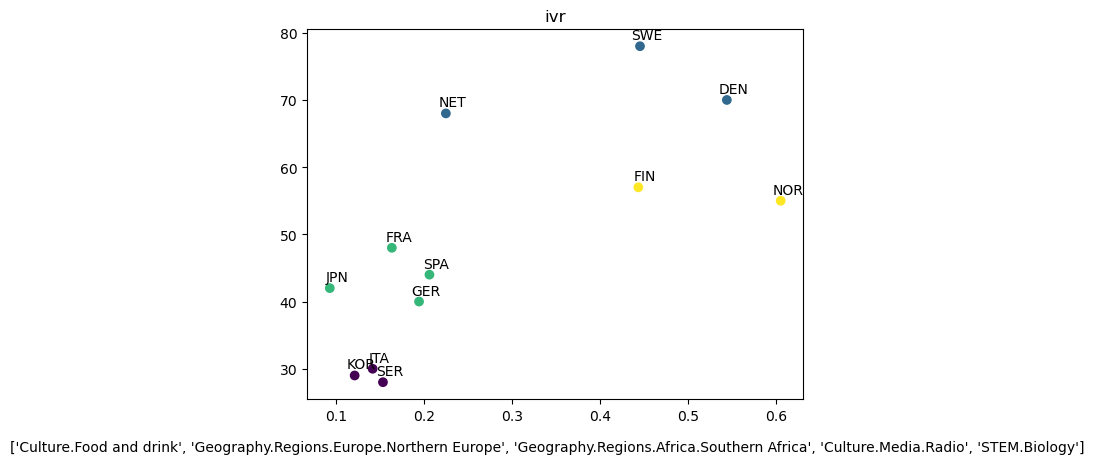

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# FILEPATH: /Users/fuligrad/Documents/Master/ada-2023-project-rablashijupa/p3_step3.ipynb
for dim in hofstede.columns:
    top5 = corr_df_before[dim].sort_values(ascending=False)[:5]
    series_list = []
    for topic in top5.index:
        series = prop_before.loc[topic]['proportion']
        series.index = series.index.map(code_dict)
        series = series.sort_index()
        series_list.append(series)
    series = sum(series_list)
    x = series.values.flatten()
    y = hofstede[dim].values[:len(x)]  # Modify y to have the same size as x
    
    # Perform clustering
    data = np.column_stack((x, y))
    silhouette_scores = []
    cluster_labels = []
    for n_clusters in range(2, 6):
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
        cluster_labels.append(labels)
    
    # Find the best number of clusters based on silhouette score
    best_n_clusters = np.argmax(silhouette_scores) + 2
    best_labels = cluster_labels[best_n_clusters - 2]
    
    # Plot the scatter plot with cluster labels
    plt.figure()
    plt.scatter(x, y, c=best_labels)
    for i, (label, x_val, y_val) in enumerate(zip(series.index, x, y)):
        plt.annotate(label, (x_val, y_val), textcoords="offset points", xytext=(5, 5), ha='center')
    plt.title(dim)
    plt.figtext(0.5, 0.01, list(top5.index), ha='center', va='center')

    


/Users/fuligrad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fuligrad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fuligrad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/fuligrad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

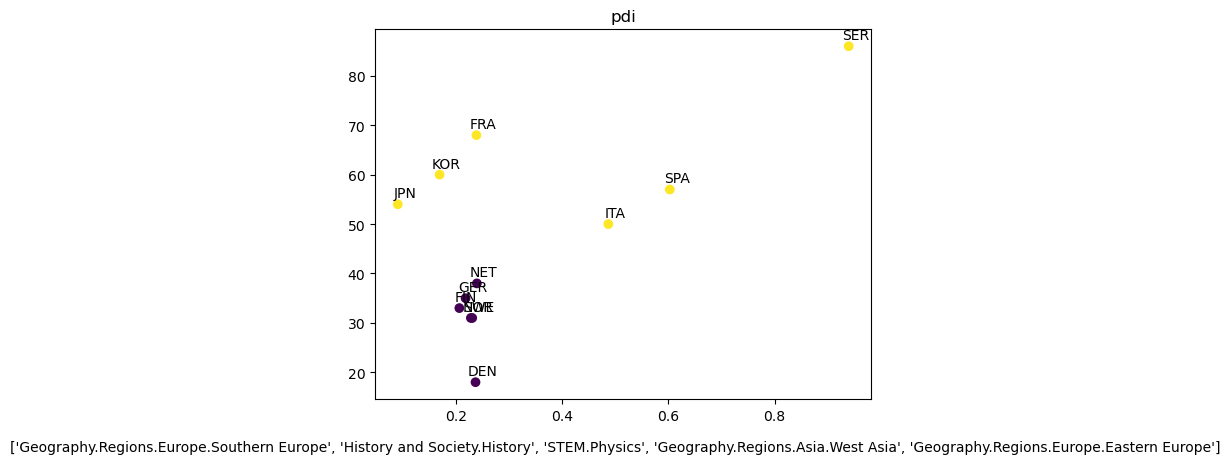

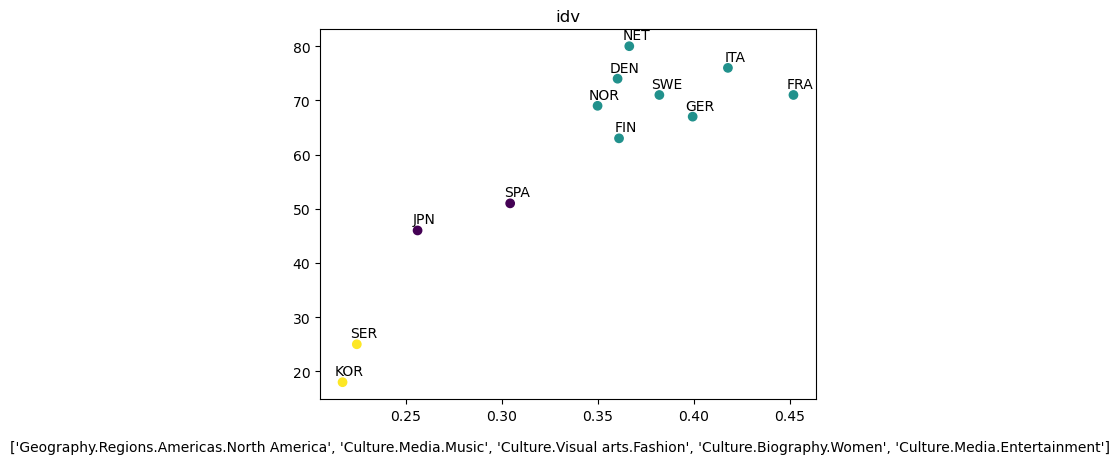

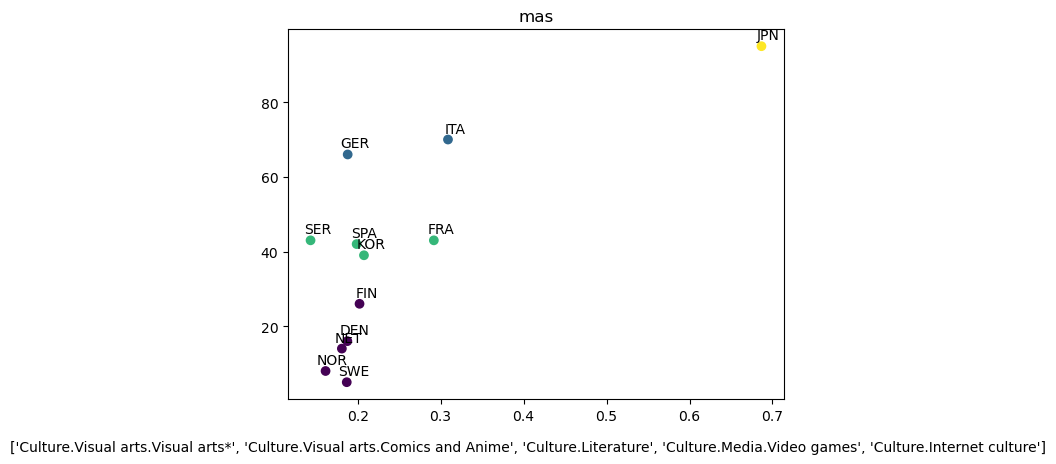

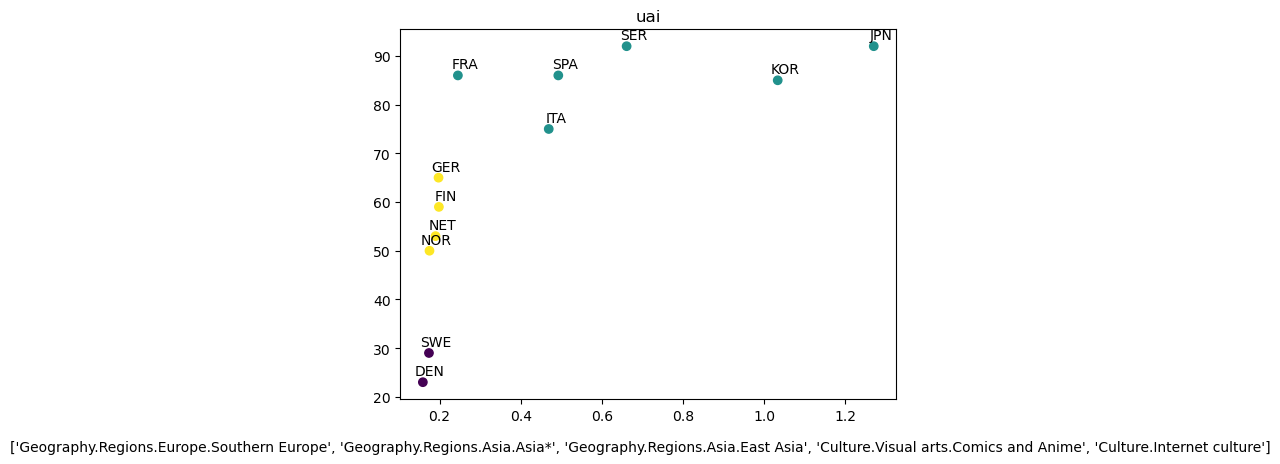

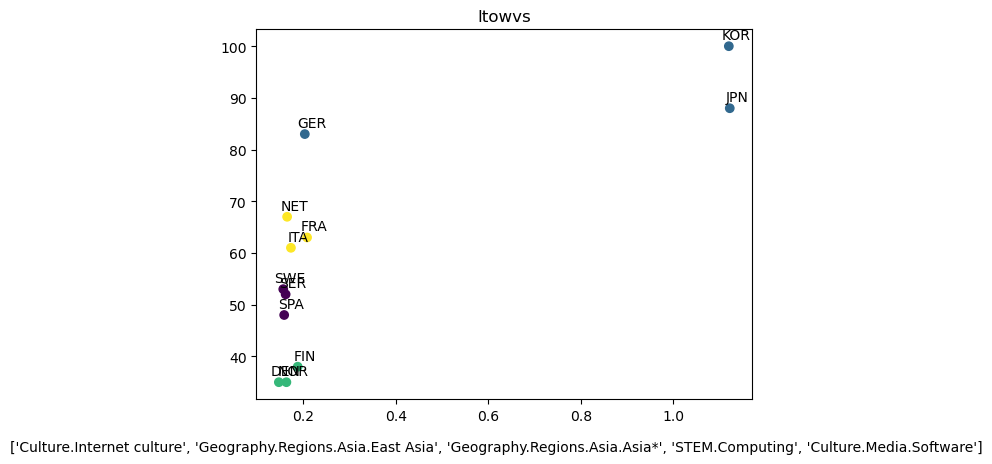

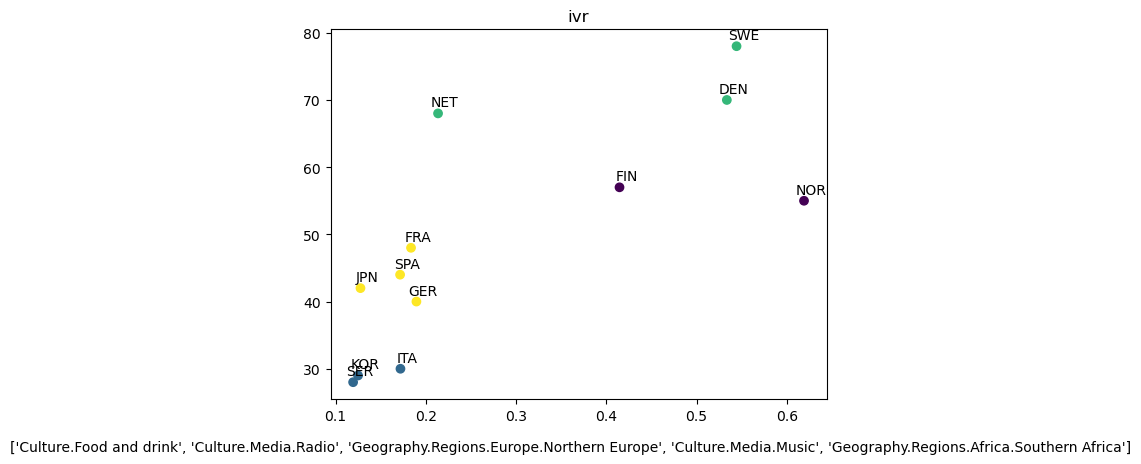

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# FILEPATH: /Users/fuligrad/Documents/Master/ada-2023-project-rablashijupa/p3_step3.ipynb
for dim in hofstede.columns:
    top5 = corr_df_after[dim].sort_values(ascending=False)[:5]
    series_list = []
    for topic in top5.index:
        series = prop_after.loc[topic]['proportion']
        series.index = series.index.map(code_dict)
        series = series.sort_index()
        series_list.append(series)
    series = sum(series_list)
    x = series.values.flatten()
    y = hofstede[dim].values[:len(x)]  # Modify y to have the same size as x
    
    # Perform clustering
    data = np.column_stack((x, y))
    silhouette_scores = []
    cluster_labels = []
    for n_clusters in range(2, 6):
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(data)
        score = silhouette_score(data, labels)
        silhouette_scores.append(score)
        cluster_labels.append(labels)
    
    # Find the best number of clusters based on silhouette score
    best_n_clusters = np.argmax(silhouette_scores) + 2
    best_labels = cluster_labels[best_n_clusters - 2]
    
    # Plot the scatter plot with cluster labels
    plt.figure()
    plt.scatter(x, y, c=best_labels)
    for i, (label, x_val, y_val) in enumerate(zip(series.index, x, y)):
        plt.annotate(label, (x_val, y_val), textcoords="offset points", xytext=(5, 5), ha='center')
    plt.title(dim)
    plt.figtext(0.5, 0.01, list(top5.index), ha='center', va='center')

    
